In [3]:
import os
import json
import pandas as pd
import numpy as np
from datetime import datetime
from glob import glob
import warnings
import IPython
import urllib
import json
import zipfile
import pickle
import shutil
import string
import math
from tqdm import tqdm
import time
import os
import gc
import re
import matplotlib.pyplot as plt
# importing the module
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2

In [2]:
json_folder_path = "/home/ubuntu/.kaggle/metadata"
list_of_files = list(os.listdir(json_folder_path))

In [3]:
for file_name in list_of_files:
    json_path = os.path.join(json_folder_path, file_name)
    print(f"Current json processed: {file_name}")
    with open(json_path) as json_file:
        # read each json
        json_data = json.load(json_file)
        # for each item in the json
        for item in json_data.items():
            # prepare the dataframe name
            file_name_split = file_name.split(".")[0]
            file_name_split = file_name_split.split("_")
            file_name_str = file_name_split[1] + "_" + file_name_split[2]
            print(f"\tCurrent json item processed: {item[0]} length: {len(item[1])}")
            data_frame_name = f"{file_name_str}_{item[0]}_df"
            print(f"\tDynamic dataframe created: {data_frame_name}")
            # dynamic creation of a dataframe, using vars()[data_frame_name]
            vars()[data_frame_name] = pd.json_normalize(json_data.get(item[0]))
            # output the dataframe
            vars()[data_frame_name].to_csv(f"{data_frame_name}", index=False)

Current json processed: iwildcam2021_megadetector_results.json
	Current json item processed: info length: 3
	Dynamic dataframe created: megadetector_results_info_df
	Current json item processed: images length: 263504
	Dynamic dataframe created: megadetector_results_images_df
	Current json item processed: detection_categories length: 2
	Dynamic dataframe created: megadetector_results_detection_categories_df
Current json processed: iwildcam2021_test_information.json
	Current json item processed: images length: 60214
	Dynamic dataframe created: test_information_images_df
Current json processed: iwildcam2021_train_annotations.json
	Current json item processed: images length: 203314
	Dynamic dataframe created: train_annotations_images_df
	Current json item processed: annotations length: 203314
	Dynamic dataframe created: train_annotations_annotations_df
	Current json item processed: categories length: 205
	Dynamic dataframe created: train_annotations_categories_df


In [4]:
print(megadetector_results_images_df.shape)
pd.set_option('display.max_colwidth', None)
megadetector_results_images_df.head()

(263504, 3)


,detections,id,max_detection_conf
0,"[{'category': '1', 'bbox': [0.6529, 0.5425, 0.3471, 0.4038], 'conf': 0.999}]",905a3c8c-21bc-11ea-a13a-137349068a90,0.999
1,"[{'category': '1', 'bbox': [0.0147, 0.0, 0.9853, 1.0], 'conf': 0.696}]",905a3fc0-21bc-11ea-a13a-137349068a90,0.696
2,[],905a420e-21bc-11ea-a13a-137349068a90,0.000
3,"[{'category': '1', 'bbox': [0.0, 0.4669, 0.1853, 0.4238], 'conf': 1.0}, {'category': '1', 'bbox': [0.2406, 0.4672, 0.0309, 0.1105], 'conf': 0.998}, {'category': '1', 'bbox': [0.5058, 0.4577, 0.06, 0.1043], 'conf': 0.911}, {'category': '1', 'bbox': [0.9902, 0.4283, 0.0098, 0.0487], 'conf': 0.697}, {'category': '1', 'bbox': [0.9956, 0.4284, 0.0044, 0.049], 'conf': 0.505}, {'category': '1', 'bbox': [0.9974, 0.4293, 0.0026, 0.0481], 'conf': 0.505}, {'category': '1', 'bbox': [0.5078, 0.4574, 0.046, 0.0656], 'conf': 0.316}]",905a4416-21bc-11ea-a13a-137349068a90,1.000
4,"[{'category': '1', 'bbox': [0.0, 0.0494, 0.5288, 0.7395], 'conf': 0.999}]",905a579e-21bc-11ea-a13a-137349068a90,0.999


In [5]:
bbox_train = megadetector_results_images_df[megadetector_results_images_df.max_detection_conf > .7]

In [6]:
bbox_train.head()

,detections,id,max_detection_conf
0,"[{'category': '1', 'bbox': [0.6529, 0.5425, 0.3471, 0.4038], 'conf': 0.999}]",905a3c8c-21bc-11ea-a13a-137349068a90,0.999
3,"[{'category': '1', 'bbox': [0.0, 0.4669, 0.1853, 0.4238], 'conf': 1.0}, {'category': '1', 'bbox': [0.2406, 0.4672, 0.0309, 0.1105], 'conf': 0.998}, {'category': '1', 'bbox': [0.5058, 0.4577, 0.06, 0.1043], 'conf': 0.911}, {'category': '1', 'bbox': [0.9902, 0.4283, 0.0098, 0.0487], 'conf': 0.697}, {'category': '1', 'bbox': [0.9956, 0.4284, 0.0044, 0.049], 'conf': 0.505}, {'category': '1', 'bbox': [0.9974, 0.4293, 0.0026, 0.0481], 'conf': 0.505}, {'category': '1', 'bbox': [0.5078, 0.4574, 0.046, 0.0656], 'conf': 0.316}]",905a4416-21bc-11ea-a13a-137349068a90,1.000
4,"[{'category': '1', 'bbox': [0.0, 0.0494, 0.5288, 0.7395], 'conf': 0.999}]",905a579e-21bc-11ea-a13a-137349068a90,0.999
7,"[{'category': '1', 'bbox': [0.4172, 0.6741, 0.2174, 0.2133], 'conf': 0.999}, {'category': '1', 'bbox': [0.54, 0.5017, 0.0487, 0.0857], 'conf': 0.523}]",905a636a-21bc-11ea-a13a-137349068a90,0.999
8,"[{'category': '1', 'bbox': [0.1367, 0.5684, 0.0745, 0.0549], 'conf': 0.818}]",905a6e1e-21bc-11ea-a13a-137349068a90,0.818


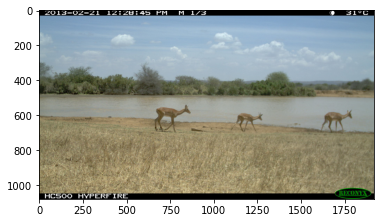

In [7]:
image = img.imread('/home/ubuntu/.kaggle/train/86760c00-21bc-11ea-a13a-137349068a90.jpg')

plt.imshow(image)
plt.show()

In [8]:
#Function to break the multiple Json detections to individual rows

def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

In [9]:
#Execute function
bbox_train = explode(bbox_train, ['detections'], fill_value='')

In [10]:
bbox_train.head()

,id,max_detection_conf,detections
0,905a3c8c-21bc-11ea-a13a-137349068a90,0.999,"{'category': '1', 'bbox': [0.6529, 0.5425, 0.3471, 0.4038], 'conf': 0.999}"
1,905a4416-21bc-11ea-a13a-137349068a90,1.000,"{'category': '1', 'bbox': [0.0, 0.4669, 0.1853, 0.4238], 'conf': 1.0}"
2,905a4416-21bc-11ea-a13a-137349068a90,1.000,"{'category': '1', 'bbox': [0.2406, 0.4672, 0.0309, 0.1105], 'conf': 0.998}"
3,905a4416-21bc-11ea-a13a-137349068a90,1.000,"{'category': '1', 'bbox': [0.5058, 0.4577, 0.06, 0.1043], 'conf': 0.911}"
4,905a4416-21bc-11ea-a13a-137349068a90,1.000,"{'category': '1', 'bbox': [0.9902, 0.4283, 0.0098, 0.0487], 'conf': 0.697}"


In [11]:
#break out detections to components
bbox_3 = bbox_train['detections'].values.tolist()
xyz = pd.DataFrame(bbox_3,columns =['category', 'bbox','conf'])

In [12]:
#Rejoin results from previous cell
Train_DF=pd.concat([bbox_train, xyz], axis=1)
Train_DF.head()

,id,max_detection_conf,detections,category,bbox,conf
0,905a3c8c-21bc-11ea-a13a-137349068a90,0.999,"{'category': '1', 'bbox': [0.6529, 0.5425, 0.3471, 0.4038], 'conf': 0.999}",1,"[0.6529, 0.5425, 0.3471, 0.4038]",0.999
1,905a4416-21bc-11ea-a13a-137349068a90,1.000,"{'category': '1', 'bbox': [0.0, 0.4669, 0.1853, 0.4238], 'conf': 1.0}",1,"[0.0, 0.4669, 0.1853, 0.4238]",1.000
2,905a4416-21bc-11ea-a13a-137349068a90,1.000,"{'category': '1', 'bbox': [0.2406, 0.4672, 0.0309, 0.1105], 'conf': 0.998}",1,"[0.2406, 0.4672, 0.0309, 0.1105]",0.998
3,905a4416-21bc-11ea-a13a-137349068a90,1.000,"{'category': '1', 'bbox': [0.5058, 0.4577, 0.06, 0.1043], 'conf': 0.911}",1,"[0.5058, 0.4577, 0.06, 0.1043]",0.911
4,905a4416-21bc-11ea-a13a-137349068a90,1.000,"{'category': '1', 'bbox': [0.9902, 0.4283, 0.0098, 0.0487], 'conf': 0.697}",1,"[0.9902, 0.4283, 0.0098, 0.0487]",0.697


In [13]:
#Split the list for BBox into mins/maxes
Train_DF[['top_x','top_y', 'W', 'H']] = pd.DataFrame(Train_DF.bbox.tolist(), index= Train_DF.index)


In [14]:
#Remove unneeded fields
Train_DF.drop(['max_detection_conf','detections'], axis=1, inplace=True)
Train_DF.head()

,id,category,bbox,conf,top_x,top_y,W,H
0,905a3c8c-21bc-11ea-a13a-137349068a90,1,"[0.6529, 0.5425, 0.3471, 0.4038]",0.999,0.6529,0.5425,0.3471,0.4038
1,905a4416-21bc-11ea-a13a-137349068a90,1,"[0.0, 0.4669, 0.1853, 0.4238]",1.000,0.0000,0.4669,0.1853,0.4238
2,905a4416-21bc-11ea-a13a-137349068a90,1,"[0.2406, 0.4672, 0.0309, 0.1105]",0.998,0.2406,0.4672,0.0309,0.1105
3,905a4416-21bc-11ea-a13a-137349068a90,1,"[0.5058, 0.4577, 0.06, 0.1043]",0.911,0.5058,0.4577,0.0600,0.1043
4,905a4416-21bc-11ea-a13a-137349068a90,1,"[0.9902, 0.4283, 0.0098, 0.0487]",0.697,0.9902,0.4283,0.0098,0.0487


In [15]:
#Filter out poor detection
Train_DF = Train_DF[Train_DF.conf > .69]


In [16]:
#Add image path to DF
Train_DF['image_path'] = f'/home/ubuntu/.kaggle/train/'+Train_DF.id+('.jpg')
Train_DF['image_file'] = Train_DF.id+('.jpg')
Train_DF.head()

,id,category,bbox,conf,top_x,top_y,W,H,image_path,image_file
0,905a3c8c-21bc-11ea-a13a-137349068a90,1,"[0.6529, 0.5425, 0.3471, 0.4038]",0.999,0.6529,0.5425,0.3471,0.4038,/home/ubuntu/.kaggle/train/905a3c8c-21bc-11ea-a13a-137349068a90.jpg,905a3c8c-21bc-11ea-a13a-137349068a90.jpg
1,905a4416-21bc-11ea-a13a-137349068a90,1,"[0.0, 0.4669, 0.1853, 0.4238]",1.000,0.0000,0.4669,0.1853,0.4238,/home/ubuntu/.kaggle/train/905a4416-21bc-11ea-a13a-137349068a90.jpg,905a4416-21bc-11ea-a13a-137349068a90.jpg
2,905a4416-21bc-11ea-a13a-137349068a90,1,"[0.2406, 0.4672, 0.0309, 0.1105]",0.998,0.2406,0.4672,0.0309,0.1105,/home/ubuntu/.kaggle/train/905a4416-21bc-11ea-a13a-137349068a90.jpg,905a4416-21bc-11ea-a13a-137349068a90.jpg
3,905a4416-21bc-11ea-a13a-137349068a90,1,"[0.5058, 0.4577, 0.06, 0.1043]",0.911,0.5058,0.4577,0.0600,0.1043,/home/ubuntu/.kaggle/train/905a4416-21bc-11ea-a13a-137349068a90.jpg,905a4416-21bc-11ea-a13a-137349068a90.jpg
4,905a4416-21bc-11ea-a13a-137349068a90,1,"[0.9902, 0.4283, 0.0098, 0.0487]",0.697,0.9902,0.4283,0.0098,0.0487,/home/ubuntu/.kaggle/train/905a4416-21bc-11ea-a13a-137349068a90.jpg,905a4416-21bc-11ea-a13a-137349068a90.jpg


In [17]:
Train_DF = Train_DF.rename(columns={'id': 'image_id'})

In [18]:
train_annotations_annotations_df.head()

,id,image_id,category_id
0,a292dd3c-21bc-11ea-a13a-137349068a90,96b00332-21bc-11ea-a13a-137349068a90,73
1,a0afcfc0-21bc-11ea-a13a-137349068a90,879d74d8-21bc-11ea-a13a-137349068a90,4
2,a306e9c0-21bc-11ea-a13a-137349068a90,9017f7aa-21bc-11ea-a13a-137349068a90,227
3,9eed94c4-21bc-11ea-a13a-137349068a90,90d93c58-21bc-11ea-a13a-137349068a90,250
4,a2a4dd7a-21bc-11ea-a13a-137349068a90,887cd0ec-21bc-11ea-a13a-137349068a90,2


In [18]:
Train_Merge = pd.merge(Train_DF, 
                       train_annotations_annotations_df, 
                       on='image_id', how='left')
Train_Merge.head()

,image_id,category,bbox,conf,top_x,top_y,W,H,image_path,image_file,id,category_id
0,905a3c8c-21bc-11ea-a13a-137349068a90,1,"[0.6529, 0.5425, 0.3471, 0.4038]",0.999,0.6529,0.5425,0.3471,0.4038,/home/ubuntu/.kaggle/train/905a3c8c-21bc-11ea-a13a-137349068a90.jpg,905a3c8c-21bc-11ea-a13a-137349068a90.jpg,9e1b0cc0-21bc-11ea-a13a-137349068a90,374.0
1,905a4416-21bc-11ea-a13a-137349068a90,1,"[0.0, 0.4669, 0.1853, 0.4238]",1.000,0.0000,0.4669,0.1853,0.4238,/home/ubuntu/.kaggle/train/905a4416-21bc-11ea-a13a-137349068a90.jpg,905a4416-21bc-11ea-a13a-137349068a90.jpg,9da8bd1e-21bc-11ea-a13a-137349068a90,97.0
2,905a4416-21bc-11ea-a13a-137349068a90,1,"[0.2406, 0.4672, 0.0309, 0.1105]",0.998,0.2406,0.4672,0.0309,0.1105,/home/ubuntu/.kaggle/train/905a4416-21bc-11ea-a13a-137349068a90.jpg,905a4416-21bc-11ea-a13a-137349068a90.jpg,9da8bd1e-21bc-11ea-a13a-137349068a90,97.0
3,905a4416-21bc-11ea-a13a-137349068a90,1,"[0.5058, 0.4577, 0.06, 0.1043]",0.911,0.5058,0.4577,0.0600,0.1043,/home/ubuntu/.kaggle/train/905a4416-21bc-11ea-a13a-137349068a90.jpg,905a4416-21bc-11ea-a13a-137349068a90.jpg,9da8bd1e-21bc-11ea-a13a-137349068a90,97.0
4,905a4416-21bc-11ea-a13a-137349068a90,1,"[0.9902, 0.4283, 0.0098, 0.0487]",0.697,0.9902,0.4283,0.0098,0.0487,/home/ubuntu/.kaggle/train/905a4416-21bc-11ea-a13a-137349068a90.jpg,905a4416-21bc-11ea-a13a-137349068a90.jpg,9da8bd1e-21bc-11ea-a13a-137349068a90,97.0


In [19]:
train_annotations_categories_df['category_id'] = train_annotations_categories_df['id']

In [20]:
#Merge the Animal types associated to the image detection
Train_Merge = pd.merge(Train_Merge, 
                       train_annotations_categories_df, 
                       on='category_id', how='left')
Train_Merge.head()

,image_id,category,bbox,conf,top_x,top_y,W,H,image_path,image_file,id_x,category_id,id_y,name
0,905a3c8c-21bc-11ea-a13a-137349068a90,1,"[0.6529, 0.5425, 0.3471, 0.4038]",0.999,0.6529,0.5425,0.3471,0.4038,/home/ubuntu/.kaggle/train/905a3c8c-21bc-11ea-a13a-137349068a90.jpg,905a3c8c-21bc-11ea-a13a-137349068a90.jpg,9e1b0cc0-21bc-11ea-a13a-137349068a90,374.0,374.0,crax rubra
1,905a4416-21bc-11ea-a13a-137349068a90,1,"[0.0, 0.4669, 0.1853, 0.4238]",1.000,0.0000,0.4669,0.1853,0.4238,/home/ubuntu/.kaggle/train/905a4416-21bc-11ea-a13a-137349068a90.jpg,905a4416-21bc-11ea-a13a-137349068a90.jpg,9da8bd1e-21bc-11ea-a13a-137349068a90,97.0,97.0,crocuta crocuta
2,905a4416-21bc-11ea-a13a-137349068a90,1,"[0.2406, 0.4672, 0.0309, 0.1105]",0.998,0.2406,0.4672,0.0309,0.1105,/home/ubuntu/.kaggle/train/905a4416-21bc-11ea-a13a-137349068a90.jpg,905a4416-21bc-11ea-a13a-137349068a90.jpg,9da8bd1e-21bc-11ea-a13a-137349068a90,97.0,97.0,crocuta crocuta
3,905a4416-21bc-11ea-a13a-137349068a90,1,"[0.5058, 0.4577, 0.06, 0.1043]",0.911,0.5058,0.4577,0.0600,0.1043,/home/ubuntu/.kaggle/train/905a4416-21bc-11ea-a13a-137349068a90.jpg,905a4416-21bc-11ea-a13a-137349068a90.jpg,9da8bd1e-21bc-11ea-a13a-137349068a90,97.0,97.0,crocuta crocuta
4,905a4416-21bc-11ea-a13a-137349068a90,1,"[0.9902, 0.4283, 0.0098, 0.0487]",0.697,0.9902,0.4283,0.0098,0.0487,/home/ubuntu/.kaggle/train/905a4416-21bc-11ea-a13a-137349068a90.jpg,905a4416-21bc-11ea-a13a-137349068a90.jpg,9da8bd1e-21bc-11ea-a13a-137349068a90,97.0,97.0,crocuta crocuta


In [21]:
#drop NA values
print(len(Train_Merge))
Train_No_Null = Train_Merge[Train_Merge['category_id'].notna()]
print(len(Train_No_Null))

232182
195706


In [22]:
result = pd.merge(train_annotations_categories_df, Train_No_Null, how="inner", on=["category_id"])
dictionary = pd.DataFrame(result, columns=['name_x', 'category_id'])
dictionary=dictionary.drop_duplicates(subset=['category_id'])
dictionary['new_category_id'] = range(len(dictionary))
dictionary

,name_x,category_id,new_category_id
0,empty,0,0
6073,tayassu pecari,2,1
20088,dasyprocta punctata,3,2
23802,cuniculus paca,4,3
23896,puma concolor,6,4
...,...,...,...
195136,sciurus sp,566,193
195464,ave desconocida,567,194
195504,aramides cajanea,568,195
195663,aramus guarauna,570,196


In [23]:
Train_No_Null=pd.merge(dictionary,Train_No_Null, how="inner", on=["category_id"])


In [24]:
Train_No_Null['category_id'] = Train_No_Null['category_id'].astype(str)
Unique_Category_List=Train_No_Null['category_id'].unique()
Unique_Category_List=Unique_Category_List.tolist()
print(Unique_Category_List)

['0', '2', '3', '4', '6', '7', '8', '9', '10', '12', '13', '14', '15', '16', '20', '24', '25', '26', '32', '44', '50', '62', '67', '70', '71', '72', '73', '74', '77', '78', '80', '83', '86', '89', '90', '91', '92', '94', '96', '97', '98', '99', '100', '101', '102', '103', '104', '106', '108', '110', '111', '112', '113', '114', '115', '116', '118', '119', '120', '121', '122', '123', '124', '127', '129', '130', '133', '134', '139', '141', '142', '144', '145', '147', '150', '152', '153', '154', '156', '159', '161', '162', '163', '166', '167', '170', '175', '177', '221', '227', '229', '230', '233', '234', '240', '242', '243', '245', '250', '252', '256', '257', '258', '259', '262', '265', '267', '268', '273', '286', '291', '292', '294', '296', '299', '300', '301', '302', '306', '307', '309', '310', '315', '316', '317', '318', '319', '320', '321', '322', '323', '324', '325', '326', '327', '328', '330', '334', '335', '336', '337', '338', '339', '340', '342', '344', '345', '346', '349', '350',

In [40]:
#Resize Image
def resize_image(filename,filepath):
    #Resizing image
    img = Image.open(filepath + filename)
    
    size = (480, 480)
    im_resized = img.resize(size, Image.NEAREST)
    im_resized.save(filepath + filename)
    return im_resized

In [25]:
#Split into train/test
Train_DF_Final = Train_No_Null.copy()
from sklearn.model_selection import train_test_split
Test_DF_Final, Test_DF_Final = train_test_split(Train_DF_Final, test_size=0.1)


In [26]:
for value in Unique_Category_List:
    temp_df=Train_No_Null[Train_No_Null.category_id == value].head(5)
    Train_DF_Final=Train_DF_Final.append(temp_df)
    del temp_df
Train_DF_Final = Train_DF_Final[Train_DF_Final['image_id'].notna()]
Train_DF_Final.head()
print(len(Train_DF_Final))

196602


In [27]:
for value in Unique_Category_List:
    temp_df=Train_No_Null[Train_No_Null.category_id == value].tail(2)
    Test_DF_Final=Test_DF_Final.append(temp_df)
    del temp_df
Test_DF_Final = Test_DF_Final[Test_DF_Final['image_id'].notna()]
print(len(Test_DF_Final))

19955


In [28]:
def get_dimensions(image_path):
    img = Image.open(image_path)
    
    # fetching the dimensions
    wid, hgt = img.size

    return (wid , hgt)

In [29]:
Test_DF_Final['image_dim']=Test_DF_Final['image_path'].apply(get_dimensions)

In [30]:
Train_DF_Final['image_dim']=Train_DF_Final['image_path'].apply(get_dimensions)

In [31]:
def convert_coco_to_yolo(x,y,w,h ):
    new_x = round(x + (w/2),4)
    new_y = round(y + (h/2),4)
    return (new_x,new_y,w,h)

In [32]:
Test_DF_Final['yolo_bbbox'] = Test_DF_Final.apply(lambda x: convert_coco_to_yolo(x['top_x'], x['top_y'], x['W'], x['H']),axis=1)

In [33]:
Train_DF_Final['yolo_bbbox'] = Train_DF_Final.apply(lambda x: convert_coco_to_yolo(x['top_x'], x['top_y'], x['W'], x['H']),axis=1)

In [34]:
Test_DF_Final.head()

,name_x,category_id,new_category_id,image_id,category,bbox,conf,top_x,top_y,W,H,image_path,image_file,id_x,id_y,name,image_dim,yolo_bbbox
77536,aepyceros melampus,96,38,907a5e90-21bc-11ea-a13a-137349068a90,1,"[0.565, 0.4756, 0.0787, 0.1485]",1.000,0.5650,0.4756,0.0787,0.1485,/home/ubuntu/.kaggle/train/907a5e90-21bc-11ea-a13a-137349068a90.jpg,907a5e90-21bc-11ea-a13a-137349068a90.jpg,a099090c-21bc-11ea-a13a-137349068a90,96.0,aepyceros melampus,"(1920, 1080)","(0.6043, 0.5499, 0.0787, 0.1485)"
81998,aepyceros melampus,96,38,8dc26da0-21bc-11ea-a13a-137349068a90,1,"[0.7479, 0.5198, 0.0526, 0.1357]",1.000,0.7479,0.5198,0.0526,0.1357,/home/ubuntu/.kaggle/train/8dc26da0-21bc-11ea-a13a-137349068a90.jpg,8dc26da0-21bc-11ea-a13a-137349068a90.jpg,9ed8f8d4-21bc-11ea-a13a-137349068a90,96.0,aepyceros melampus,"(1920, 1080)","(0.7742, 0.5877, 0.0526, 0.1357)"
42885,bos taurus,71,24,89e39916-21bc-11ea-a13a-137349068a90,1,"[0.6073, 0.4856, 0.1258, 0.1564]",0.999,0.6073,0.4856,0.1258,0.1564,/home/ubuntu/.kaggle/train/89e39916-21bc-11ea-a13a-137349068a90.jpg,89e39916-21bc-11ea-a13a-137349068a90.jpg,9deac574-21bc-11ea-a13a-137349068a90,71.0,bos taurus,"(1920, 1080)","(0.6702, 0.5638, 0.1258, 0.1564)"
74350,loxodonta africana,90,34,96a7bd76-21bc-11ea-a13a-137349068a90,1,"[0.2189, 0.3868, 0.0811, 0.1597]",0.989,0.2189,0.3868,0.0811,0.1597,/home/ubuntu/.kaggle/train/96a7bd76-21bc-11ea-a13a-137349068a90.jpg,96a7bd76-21bc-11ea-a13a-137349068a90.jpg,9ad22bc0-21bc-11ea-a13a-137349068a90,90.0,loxodonta africana,"(1920, 1080)","(0.2595, 0.4667, 0.0811, 0.1597)"
176708,crax rubra,374,159,8fbfee20-21bc-11ea-a13a-137349068a90,1,"[0.7807, 0.4727, 0.2193, 0.4917]",0.918,0.7807,0.4727,0.2193,0.4917,/home/ubuntu/.kaggle/train/8fbfee20-21bc-11ea-a13a-137349068a90.jpg,8fbfee20-21bc-11ea-a13a-137349068a90.jpg,9a4fd792-21bc-11ea-a13a-137349068a90,374.0,crax rubra,"(1280, 1024)","(0.8903, 0.7186, 0.2193, 0.4917)"


In [35]:
Train_DF_Final = Train_DF_Final[Train_DF_Final['image_id'].notna()]
Test_DF_Final = Test_DF_Final[Test_DF_Final['image_id'].notna()]

In [36]:
df_new = Train_DF_Final[Train_DF_Final['image_id'] == '86760c00-21bc-11ea-a13a-137349068a90']
df_new[['bbox','yolo_bbbox','category_id','name_x','image_dim']]


,bbox,yolo_bbbox,category_id,name_x,image_dim
87720,"[0.3427, 0.4979, 0.1082, 0.1486]","(0.3968, 0.5722, 0.1082, 0.1486)",96,aepyceros melampus,"(1920, 1080)"
87721,"[0.8385, 0.5263, 0.0979, 0.1277]","(0.8875, 0.5901, 0.0979, 0.1277)",96,aepyceros melampus,"(1920, 1080)"
87722,"[0.5736, 0.5378, 0.0936, 0.1083]","(0.6204, 0.5919, 0.0936, 0.1083)",96,aepyceros melampus,"(1920, 1080)"


In [44]:
 Train_DF_Final.loc[Train_DF_Final['new_category_id'].idxmax()]

,name_x,category_id,new_category_id,image_id,category,bbox,conf,top_x,top_y,W,H,image_path,image_file,id_x,id_y,name,image_dim,yolo_bbbox
195704,mazama temama,571,197,97099a1e-21bc-11ea-a13a-137349068a90,1,"[0.4687, 0.7357, 0.5313, 0.2488]",0.997,0.4687,0.7357,0.5313,0.2488,/home/ubuntu/.kaggle/train/97099a1e-21bc-11ea-a13a-137349068a90.jpg,97099a1e-21bc-11ea-a13a-137349068a90.jpg,9a9cfa54-21bc-11ea-a13a-137349068a90,571.0,mazama temama,"(1280, 1024)","(0.7344, 0.8601, 0.5313, 0.2488)"
195704,mazama temama,571,197,97099a1e-21bc-11ea-a13a-137349068a90,1,"[0.4687, 0.7357, 0.5313, 0.2488]",0.997,0.4687,0.7357,0.5313,0.2488,/home/ubuntu/.kaggle/train/97099a1e-21bc-11ea-a13a-137349068a90.jpg,97099a1e-21bc-11ea-a13a-137349068a90.jpg,9a9cfa54-21bc-11ea-a13a-137349068a90,571.0,mazama temama,"(1280, 1024)","(0.7344, 0.8601, 0.5313, 0.2488)"


In [46]:
os.makedirs('/home/ubuntu/capstone/train/labels', exist_ok = True)
os.makedirs('/home/ubuntu/capstone/train/images', exist_ok = True)
os.makedirs('/home/ubuntu/capstone/val/images', exist_ok = True)
os.makedirs('/home/ubuntu/capstone/val/labels', exist_ok = True)
os.makedirs('/home/ubuntu/capstone/train/labelsT', exist_ok = True)
os.makedirs('/home/ubuntu/capstone/train/imagesT', exist_ok = True)
os.makedirs('/home/ubuntu/capstone/train/imagesR', exist_ok = True)
os.makedirs('/home/ubuntu/capstone/val/imagesR', exist_ok = True)

In [47]:
# iterate through each row and select for train labels
train_root_location ='/home/ubuntu/capstone/train/labelsT'


for index, row in Train_DF_Final.iterrows():
    if row["image_id"]=='86760c00-21bc-11ea-a13a-137349068a90':
        
        with open((train_root_location+"/"+ str(row["image_id"]) + ".txt"), 'a+') as f1:
            rec=str(row["new_category_id"])+" "+" ".join(str(x) for x in row["yolo_bbbox"])
            f1.write(rec)
            f1.write("\n")

In [48]:
# iterate through each row and select for train labels
train_root_location ='/home/ubuntu/capstone/train/labels'
for index, row in Train_DF_Final.iterrows():
   
    with open((train_root_location+"/"+ str(row["image_id"]) + ".txt"), 'a+') as f1:
        rec=str(row["new_category_id"])+" "+" ".join(str(x) for x in row["yolo_bbbox"])
        f1.write(rec)
        f1.write("\n")
     

In [49]:
# iterate through each row and select for val labels
test_root_location ='/home/ubuntu/capstone/val/labels'
for index, row in Test_DF_Final.iterrows():
    with open((test_root_location+"/"+ str(row["image_id"]) + ".txt"), "a+") as f:
        rec=str(row["new_category_id"])+" "+" ".join(str(x) for x in row["yolo_bbbox"])
        f.write(rec)
        f.write("\n")

In [50]:
train_files = []
val_files   = []
val_files += list(Test_DF_Final.image_path.unique())
train_files += list(Train_DF_Final.image_path.unique())
len(train_files), len(val_files)

(112375, 17570)

In [51]:
for file in tqdm(train_files):
    try:
        shutil.copy(file, '/home/ubuntu/capstone/train/images')
      
    except:
        pass
    


100%|██████████| 112375/112375 [01:15<00:00, 1490.43it/s]


In [52]:
for file in tqdm(val_files):
    try:
        shutil.copy(file, '/home/ubuntu/capstone/val/images')
        
    except:
        pass

100%|██████████| 17570/17570 [00:15<00:00, 1099.97it/s]


In [54]:
import cv2


def display_box(image,label):
    img = cv2.imread(image)
    dh, dw, _ = img.shape

    fl = open(label, 'r')
    data = fl.readlines()
    fl.close()

    print(data)

    for dt in data:

        # Split string to float
        _, x, y, w, h = map(float, dt.split(' '))

        # Taken from https://github.com/pjreddie/darknet/blob/810d7f797bdb2f021dbe65d2524c2ff6b8ab5c8b/src/image.c#L283-L291
        # via https://stackoverflow.com/questions/44544471/how-to-get-the-coordinates-of-the-bounding-box-in-yolo-object-detection#comment102178409_44592380
        l = int((x - w / 2) * dw)
        r = int((x + w / 2) * dw)
        t = int((y - h / 2) * dh)
        b = int((y + h / 2) * dh)

        if l < 0:
            l = 0
        if r > dw - 5:
            r = dw - 5
        if t < 0:
            t = 0
        if b > dh - 5:
            b = dh - 5

        cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)

    plt.imshow(img)
    plt.show()

In [61]:
def resize_image(img,scale):
    img = Image.open(image)
    width, height = img.size
    im_resized = img.resize((width//scale, height//scale))
    #im_resized = img.resize(size, Image.NEAREST)
    new_path ="/home/ubuntu/capstone/train/imagesT"
    im_resized.save('/home/ubuntu/capstone/train/imagesT/86760c00-21bc-11ea-a13a-137349068a90.jpg')
    

['38 0.3968 0.5722 0.1082 0.1486\n', '38 0.8875 0.5901 0.0979 0.1277\n', '38 0.6204 0.5919 0.0936 0.1083\n']


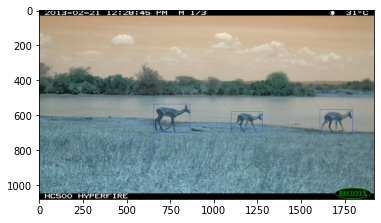

In [55]:
image = '/home/ubuntu/capstone/train/images/86760c00-21bc-11ea-a13a-137349068a90.jpg'
label='/home/ubuntu/capstone/train/labels/86760c00-21bc-11ea-a13a-137349068a90.txt'
display_box(image,label)

['96 0.3968 0.5722 0.1082 0.1486\n', '96 0.8875 0.5901 0.0979 0.1277\n', '96 0.6204 0.5919 0.0936 0.1083\n']


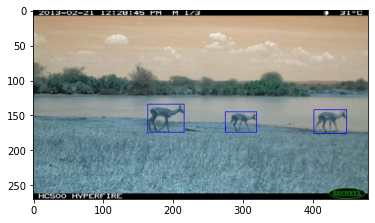

In [63]:
resize_image(image,4)
image1="/home/ubuntu/capstone/train/imagesT/86760c00-21bc-11ea-a13a-137349068a90.jpg"
display_box(image1,label)

In [1]:
def resize_aspect_fit(path,new_path,scale):
    dirs = os.listdir(path)
    size = (480, 480)
    for filename in dirs:
        
        if os.path.isfile(path+filename):
#             print(path+filename)
            img = Image.open(path+filename)
            width, height = img.size
            im_resized = img.resize((width//scale, height//scale))
            #im_resized = img.resize(size, Image.NEAREST)
            im_resized.save(new_path + filename)
 

In [57]:
old_loc="/home/ubuntu/capstone/train/images/"
new_loc="/home/ubuntu/capstone/train/imagesR/"
resize_aspect_fit(old_loc,new_loc,4)

In [4]:
old_loc_test="/home/ubuntu/capstone/val/images/"
new_loc_test="/home/ubuntu/capstone/val/imagesR/"
resize_aspect_fit(old_loc_test,new_loc_test,4)

In [5]:
def check_dimensions(path,image):
    img = Image.open(path + image)
    
    # fetching the dimensions
    wid, hgt = img.size

    # displaying the dimensions
    print(str(wid) + "x" + str(hgt))

In [6]:
check_dimensions("/home/ubuntu/capstone/train/images/","89bf560a-21bc-11ea-a13a-137349068a90.jpg")

check_dimensions("/home/ubuntu/capstone/train/imagesR/","89bf560a-21bc-11ea-a13a-137349068a90.jpg")


1920x1080
480x270


In [9]:
check_dimensions("/home/ubuntu/capstone/val/images/","930975ec-21bc-11ea-a13a-137349068a90.jpg")
check_dimensions("/home/ubuntu/capstone/val/imagesR/","930975ec-21bc-11ea-a13a-137349068a90.jpg")

2048x1536
512x384


In [10]:
path, dirs, train_files = next(os.walk("/home/ubuntu/capstone/train/images"))

path, dirs,val_files = next(os.walk("/home/ubuntu/capstone/val/images"))

print(len(train_files))
print(len(val_files))

112375
17570


In [11]:
class_ids, class_names = list(zip(*set(zip(Train_DF_Final.new_category_id, Train_DF_Final.name))))
classes = list(np.array(class_names)[np.argsort(class_ids)])
classes = list(map(lambda x: str(x), classes))
classes


NameError: name 'Train_DF_Final' is not defined

In [42]:
len(classes)

198

In [197]:
from os import listdir
from os.path import isfile, join
import yaml

cwd = '/home/ubuntu/capstone'

data = dict(
    train =  "../train/images/" ,
    val   =  "../val/images/",
    nc    = 198,
    names = classes
    )

In [198]:
with open(join( cwd , 'capstone.yaml'), 'w') as outfile:
    yaml.dump(data, outfile, default_flow_style=False)

f = open(join( cwd , 'capstone.yaml'), 'r')
print(f.read())

names:
- empty
- tayassu pecari
- dasyprocta punctata
- cuniculus paca
- puma concolor
- tapirus terrestris
- pecari tajacu
- mazama americana
- leopardus pardalis
- geotrygon montana
- nasua nasua
- dasypus novemcinctus
- eira barbara
- didelphis marsupialis
- procyon cancrivorus
- panthera onca
- myrmecophaga tridactyla
- tinamus major
- sylvilagus brasiliensis
- puma yagouaroundi
- leopardus wiedii
- mazama gouazoubira
- philander opossum
- capra aegagrus
- bos taurus
- ovis aries
- canis lupus
- lepus saxatilis
- turtur calcospilos
- papio anubis
- genetta genetta
- tragelaphus scriptus
- equus africanus
- herpestes sanguineus
- loxodonta africana
- cricetomys gambianus
- raphicerus campestris
- hyaena hyaena
- aepyceros melampus
- crocuta crocuta
- caracal caracal
- equus ferus
- panthera leo
- tragelaphus oryx
- kobus ellipsiprymnus
- phacochoerus africanus
- panthera pardus
- ichneumia albicauda
- canis mesomelas
- syncerus caffer
- equus quagga
- giraffa camelopardalis
- alcela